In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
data = pd.read_pickle('/home/dmasny/Downloads/inference.pkl')
data = data['l']
data = np.reshape(data, (-1, 6))

In [ ]:
smoothed_data = []

In [154]:
def exponential_smoothing(data, halflife, window_size):
    """according to formula from here 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    weighted func"""
    alpha = 1 - np.exp(np.log(0.5) / halflife)
    weights = (1 - alpha) ** [i for i in range(0, window_size)]
    result = []
    for column in range(data.shape[1]):
        #firstly slice data by column then reverse column according to the formula from doc
        result.append((data[:, column][::-1] * weights).sum() / weights.sum()) # just explicit representation of formula
    return result

In [155]:
def apply_smoothing(halflife, halflife_in_window):
    global smoothed_data
    global data
    # window size in paper is 25 (halflife * halflife_in_window = 5 * 5 = 25)
    # but when the sufficient amoun of data is not collected I suppose to reduce the window size
    # to the length of the collected data on current step
    # also it makes sense when we reach the end of the data
    smoothed_data.append(exponential_smoothing(data[: min(len(data), halflife * halflife_in_window)], 
                                               halflife, 
                                               min(len(data), halflife * halflife_in_window)))
    

In [156]:
while len(data) > 0:
    apply_smoothing(5, 5)
    data = np.delete(data, (0), axis = 0) # moving window (pop the first row on each cycle)

In [160]:
smoothed_data = np.array(smoothed_data)

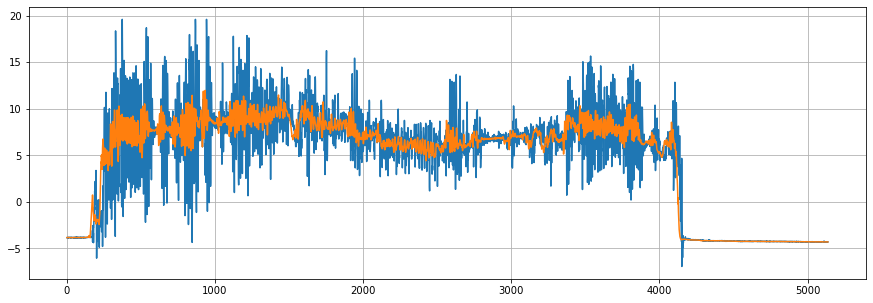

In [168]:
plt.figure(figsize = (15, 5))
plt.plot(data[:, 0])
plt.plot(smoothed_data[:, 0])
plt.grid()

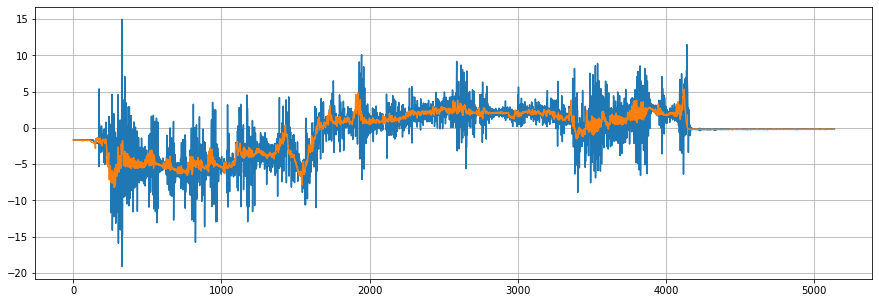

In [169]:
plt.figure(figsize = (15, 5))
plt.plot(data[:, 1])
plt.plot(smoothed_data[:, 1])
plt.grid()

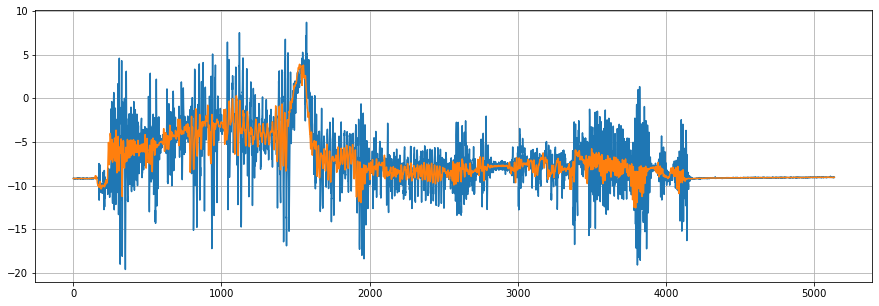

In [170]:
plt.figure(figsize = (15, 5))
plt.plot(data[:, 2])
plt.plot(smoothed_data[:, 2])
plt.grid()

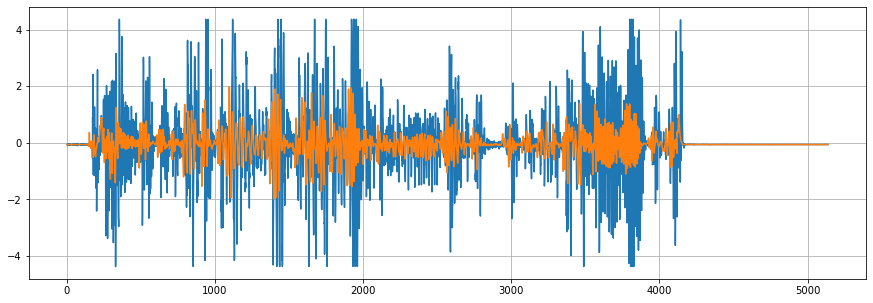

In [171]:
plt.figure(figsize = (15, 5))
plt.plot(data[:, 3])
plt.plot(smoothed_data[:, 3])
plt.grid()